In [2]:
working_dir = '/mnt/c/users/fordd/Downloads/RW_PGM_FE/'
py_files_dir =  working_dir+'py_files/'
saved_arrays_dir = working_dir+'saved_arrays/'
saved_models_dir = working_dir+'saved_models/'

In [3]:
import os

os.chdir(py_files_dir)

from utils import *

os.chdir(working_dir)

In [4]:
import matplotlib as mpl
#mpl.rc('xtick', labelsize=11) 
#mpl.rc('ytick', labelsize=11) 

In [12]:
from pymbar import MBAR

In [20]:
delta_f_ground_truth = np.array([3.35295982, 1.14269877, 0.        ])
f_ground_truth = np.array([8.93431652, 6.72405548, 5.5813567 ])

In [6]:
estimates, grid, AVMD_f_T_all, AVMD_S_T_all =  load_pickle_(saved_arrays_dir+'toy_est_grid_AVall_III')
av_u_T = estimates[:,:,8].mean(1)
av_u_T -= av_u_T[0] # av_u_T.min()
av_u_V = estimates[:,:,9].mean(1)
av_u_V -=  av_u_V[0] #av_u_V.min()
av_u_GT = (av_u_V+av_u_T)*0.5
av_u_GT -= av_u_GT[0] #.min()
av_u_GT

array([ 0.        , -2.12091977, -2.52223027])

In [8]:
name_save_BAR_inputs = 'toy_BAR_inputs_III'
name_save_mBAR_inputs = 'toy_MBAR_inputs_III'
n_states = 3

# Obtaining mBAR results using pymbar:

In [9]:
state_min = 2

estimates_MBAR = np.zeros([4, grid.shape[0], n_states])

for i in range(grid.shape[0]):
    clear_output(wait=True) ; print(i)
    name = name_save_mBAR_inputs+'_PHIij_T_'+str(i)
    x = load_pickle_(saved_arrays_dir+name) ; m = x.shape[-1]
    try:
        mbar_res = MBAR(x.reshape(n_states,n_states*m), np.array([m]*n_states)).compute_free_energy_differences()
        FE = mbar_res['Delta_f'][state_min]
        SD = mbar_res['dDelta_f'][state_min]
    except:
        FE = 0. ; SD = 0
    estimates_MBAR[0,i,:] = FE
    estimates_MBAR[1,i,:] = SD
    
    name = name_save_mBAR_inputs+'_PHIij_V_'+str(i)
    x = load_pickle_(saved_arrays_dir+name) ; m = x.shape[-1]
    try:
        mbar_res = MBAR(x.reshape(n_states,n_states*m), np.array([m]*n_states)).compute_free_energy_differences()
        FE = mbar_res['Delta_f'][state_min]
        SD = mbar_res['dDelta_f'][state_min]
    except:
        FE = 0. ; SD = 0
    estimates_MBAR[2,i,:] = FE
    estimates_MBAR[3,i,:] = SD

199


# Obtaining BAR results using pymbar:

In [10]:
estimates_BAR = np.zeros([4, grid.shape[0], n_states])
offset = 10.0 # does not work if av_u + av_ln_p too far from zero here

for i in range(grid.shape[0]):
    clear_output(wait=True)
    print(i)
    for k in range(n_states):
        name = name_save_BAR_inputs+'_BAR_input_'+str(i)+'_state'+str(k)+'_'+'_T'
        x = load_pickle_(saved_arrays_dir+name) ; m = x.shape[-1]//2
        try:
            mbar_res = MBAR(np.stack([
                    x[0] - offset,
                    x[1],
                ],axis=0), np.array([m]*2)).compute_free_energy_differences()
            FE = mbar_res['Delta_f'][1,0] + offset
            SD = mbar_res['dDelta_f'][1,0]
        except:
            FE = 0. ; SD = 0
        estimates_BAR[0,i,k] = FE
        estimates_BAR[1,i,k] = SD
        
        name = name_save_BAR_inputs+'_BAR_input_'+str(i)+'_state'+str(k)+'_'+'_V'
        x = load_pickle_(saved_arrays_dir+name) ; m = x.shape[-1]//2
        try:
            mbar_res = MBAR(np.stack([
                    x[0] - offset,
                    x[1],
                ],axis=0), np.array([m]*2)).compute_free_energy_differences()
            FE = mbar_res['Delta_f'][1,0] + offset
            SD = mbar_res['dDelta_f'][1,0]
        except:
            FE = 0. ; SD = 0
            print('!')
        estimates_BAR[2,i,k] = FE
        estimates_BAR[3,i,k] = SD

199


In [13]:
i=k=0
name = name_save_BAR_inputs+'_BAR_input_'+str(i)+'_state'+str(k)+'_'+'_T'
x = load_pickle_(saved_arrays_dir+name) ; m = x.shape[-1]//2

MD_energies_T = np.zeros([n_states, grid.shape[0], m])
MD_energies_V = np.zeros([n_states, grid.shape[0], m])
BG_energies = np.zeros([n_states, grid.shape[0], m])
BG_f = np.zeros([n_states, grid.shape[0], m])

for i in range(grid.shape[0]):
    clear_output(wait=True)
    print(i)
    for k in range(n_states):
        name = name_save_BAR_inputs+'_BAR_input_'+str(i)+'_state'+str(k)+'_'+'_T'
        x = load_pickle_(saved_arrays_dir+name) ; m = x.shape[-1]//2
        BG_energies[k,i] = x[0,m:]
        MD_energies_T[k,i] = x[0,:m]
        BG_f[k,i] = x[0,m:] - x[1,m:]
        ##
        name = name_save_BAR_inputs+'_BAR_input_'+str(i)+'_state'+str(k)+'_'+'_V'
        x = load_pickle_(saved_arrays_dir+name) ; m = x.shape[-1]//2
        MD_energies_V[k,i] = x[0,:m]

199


In [14]:
less100_mask = np.where(BG_energies<100,1,0)
av_BG = (less100_mask*BG_f).sum(-1) / less100_mask.sum(-1) 

In [15]:
import matplotlib as mpl
mpl.rc('xtick', labelsize=11) 
mpl.rc('ytick', labelsize=11) 
plt.style.use('classic')
%matplotlib inline
fontname = 'Times New Roman'
plt.rcParams["font.family"] = fontname
plt.rcParams['font.size'] = 15
default_colours = [
'#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'
]

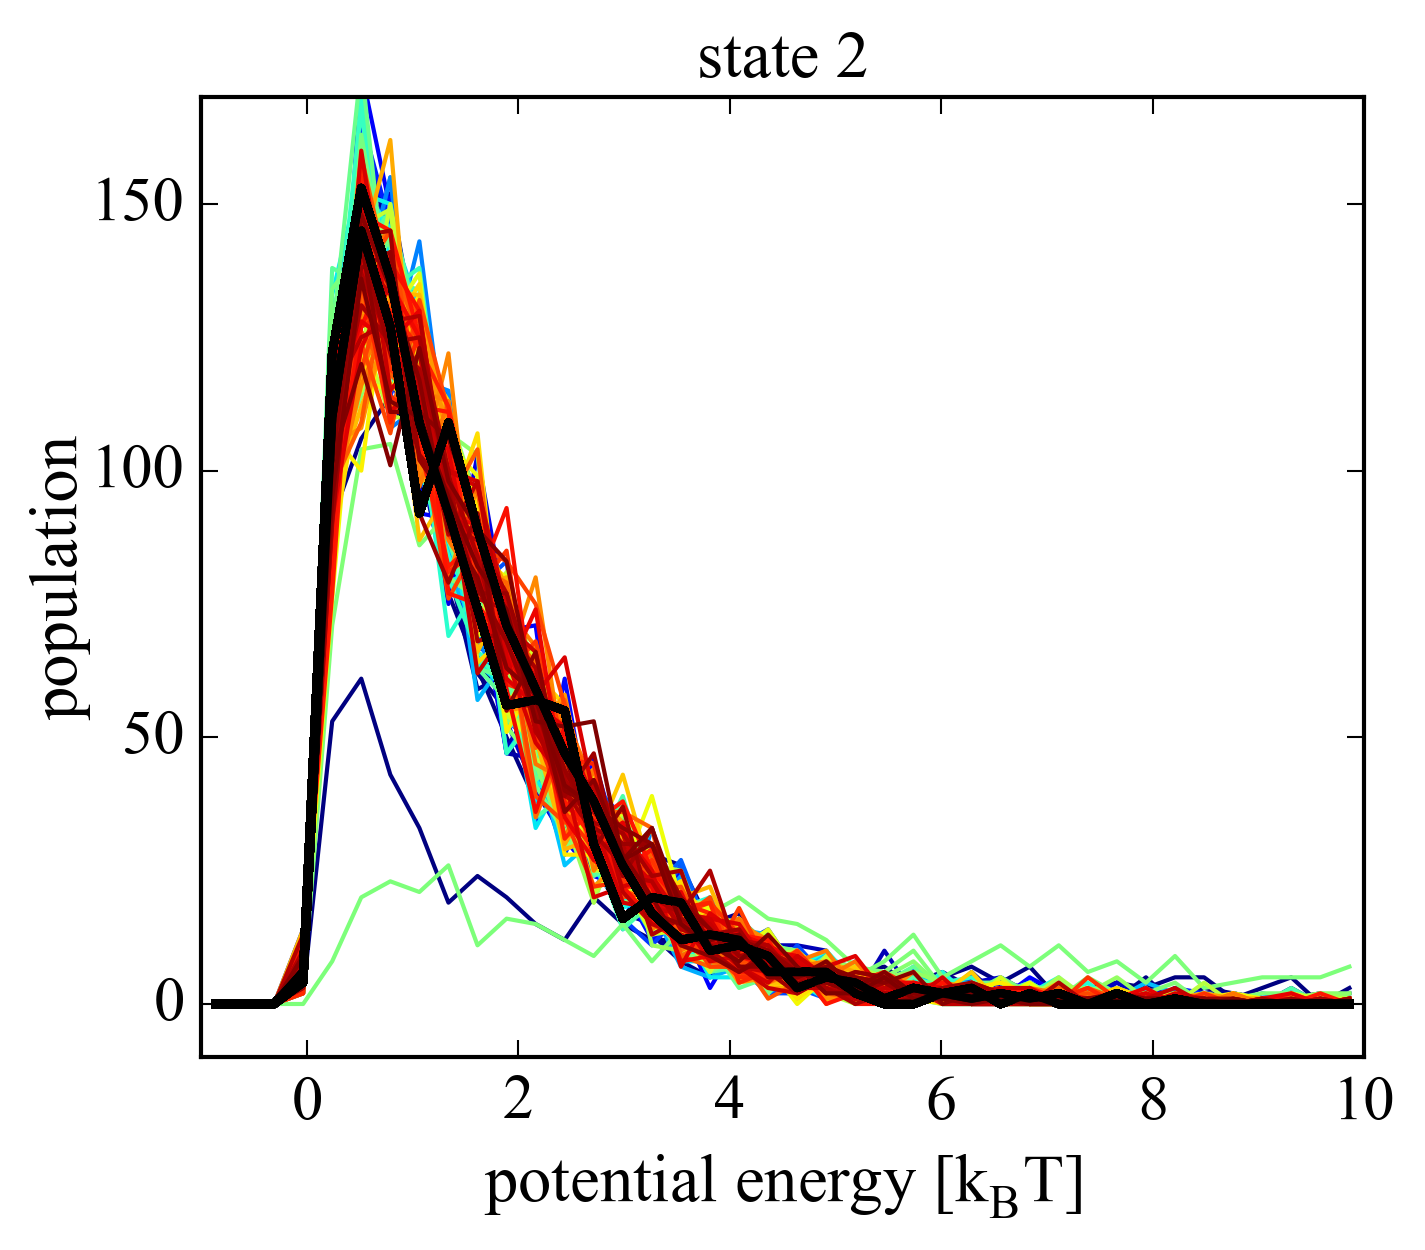

In [16]:
state = 2

n_bins = 40 ; density = False
a = -1
b = 10
axis = np.linspace(a,b,n_bins+1)
axis = axis[1:] - 0.5*(axis[1]-axis[0])

colors = plt.cm.jet(np.linspace(0,1,grid.shape[0]))
custom_cmap = mpl.colors.ListedColormap(colors)

fig = plt.figure(figsize=(5,4),dpi=300, facecolor="white")

for i in range(grid.shape[0]):
    plt.plot(axis,
             np.histogram(BG_energies[state,i],range=[a,b],bins=n_bins,density=density)[0],
             color=custom_cmap.colors[i])
    
    plt.plot(axis,
             np.histogram(MD_energies_T[state,i],range=[a,b],bins=n_bins,density=density)[0],
             color='black',linewidth=2)
    plt.plot(axis,
             np.histogram(MD_energies_V[state,i],range=[a,b],bins=n_bins,density=density)[0],
             color='black',linewidth=2)
    
plt.title('state '+str(state), size=16)
plt.ylim(-10,170)
plt.xlim(a,b)
plt.xlabel('potential energy [$\mathregular{k_B}$T]', size=16)
plt.ylabel('population', labelpad=0, size=16)
plt.show()

In [17]:
plt.rcParams['font.size'] = 14

(0.0, 10000.0)

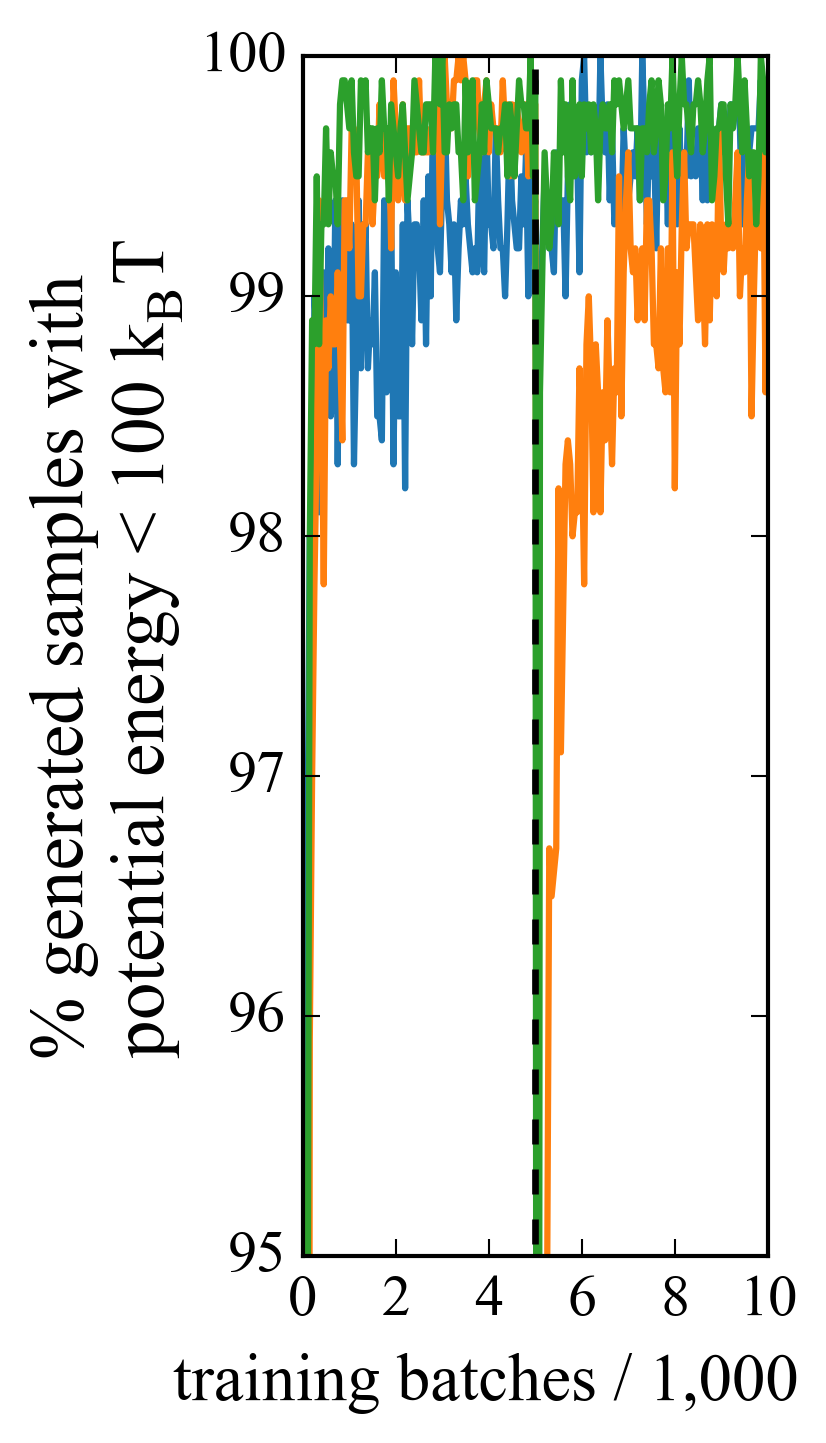

In [18]:
less100_mask = np.where(BG_energies<100,1,0)
av_BG = (less100_mask*BG_f).sum(-1) / less100_mask.sum(-1)

fig = plt.figure(figsize=(2,5),dpi=300, facecolor="white")
for k in range(n_states):
    plt.plot(grid,100*less100_mask.sum(-1)[k]/m,color=default_colours[k],
            linewidth=1.5) 

plt.xticks([0,2000,4000,6000,8000,10000],[0,2,4,6,8,10])
plt.plot([5000]*2,[0.,100],'--',color='black',linewidth=0.8*2)
plt.yticks([95,96,97,98,99,100],[95,96,97,98,99,100])
plt.xlabel('training batches / 1,000      ', size=16, labelpad=6)
plt.ylabel('% generated samples with \n potential energy < 100 $\mathregular{k_B}$T',
           labelpad=3, size=18)
plt.ylim(95,100)
plt.xlim(0,10000)

2


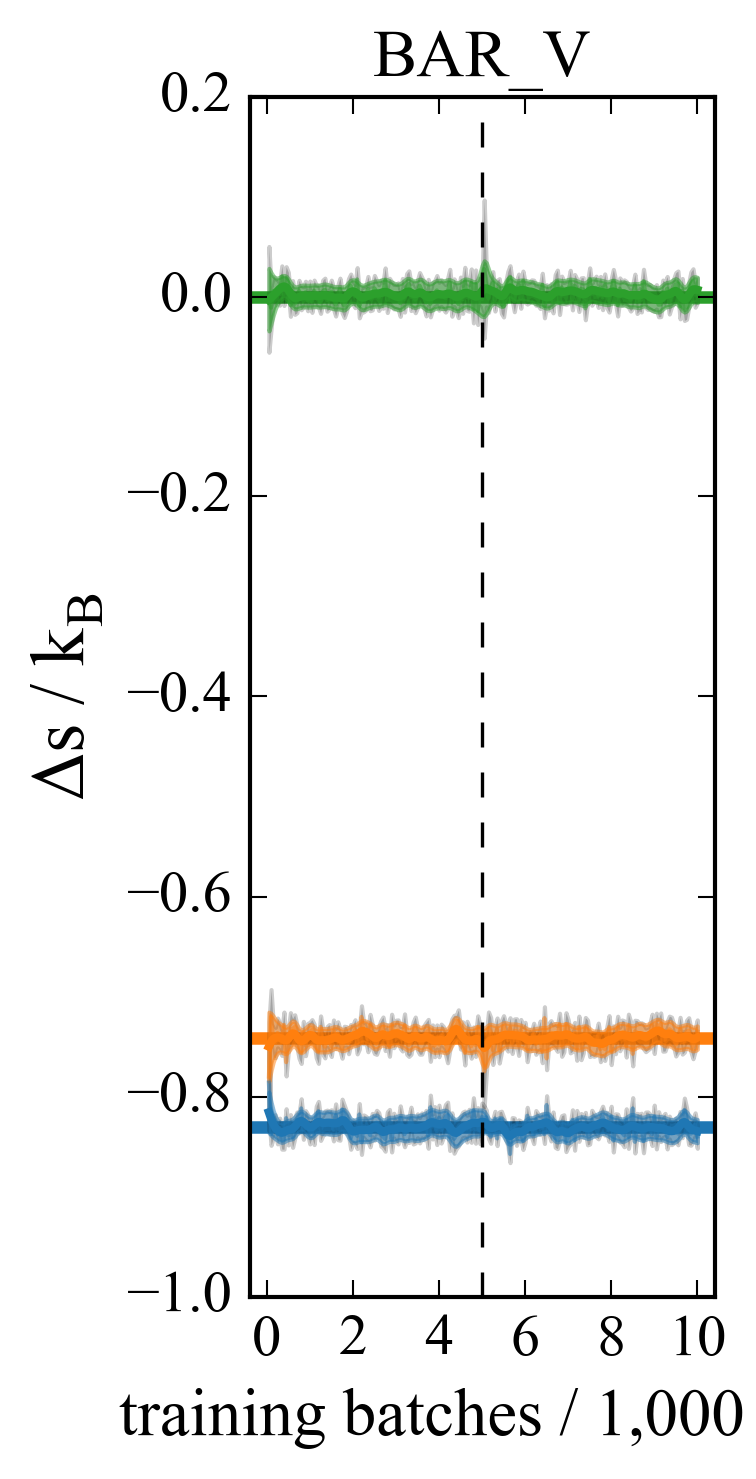

In [29]:
ind_min = np.argmin(delta_f_ground_truth)
print(ind_min)

# selecting which result to plot:
name = 'BAR_V'#5

av_u_GT = (estimates[:,:,8].mean(1) + estimates[:,:,8].mean(1))*0.5
negS_GT = np.array(delta_f_ground_truth-av_u_GT)
negS_GT  -= negS_GT[ind_min]

if type(name) is int:
    start =  20 #135
    end = 30
    x = fs_to_deltafs_(-(estimates[:,:,name].T - av_u_GT), ind_min=ind_min, start=start, median=True) # (m,n_states)
    xL = x - np.nan
    xU = x + np.nan
    if name == 0: name = 'AVMD_T'
    elif name == 1: name = 'AVMD_V'
    elif name == 2:
        name = 'AVBG'
        x = fs_to_deltafs_(-(np.array(av_BG.T) - av_u_GT), ind_min=ind_min, start=start)
        xL = x - np.nan
        xU = x + np.nan
    elif name == 3: name = 'EXPMD_T'
    elif name == 4: name = 'EXPMD_V'
    elif name == 5: name = 'EXPBG'
    elif name == 6: name = 'BAR_T(local)'
    elif name == 7: name = 'BAR_V(local)'
    else: print('not')
else: pass

if type(name) is str and 'BAR' in name and 'M' not in name:
    if 'V' in name: 
        which = 2
        start = 10
        end = 40 # 10        
    else: 
        which  = 0
        start = 0
        end = 1000
    x = fs_to_deltafs_(-(estimates_BAR[which] - av_u_GT), ind_min=ind_min, start=start, end=end) # (m,n_states)
    xL = x - estimates_BAR[which+1]
    xU = x + estimates_BAR[which+1]
else: pass

if type(name) is str and 'MBAR' in name:
    start = 10
    end = 40 # 10
    if 'V' in name: which = 2
    else: which  = 0
    x = fs_to_deltafs_(-(estimates_MBAR[which] - av_u_GT), ind_min=ind_min, start=start, end=end) # (m,n_states)
    xL = x - estimates_MBAR[which+1]
    xU = x + estimates_MBAR[which+1]
else: pass

fig = plt.figure(figsize=(2,5),dpi=300, facecolor="white")
[plt.plot([-400,grid[-1]+400],[-negS_GT[k]]*2, color=default_colours[k], linewidth=3, zorder=-10) for k in range(n_states)]

[plt.plot(grid, x[:,k], color=default_colours[k], alpha=0.5, linewidth=1) for k in range(n_states)]

[plt.fill_between(grid,
                 xL[:,k],
                 xU[:,k],
                 alpha=0.2,
                 color='black',
                
                ) for k in range(n_states)]
[plt.fill_between(grid,
                 simple_smoother_(xL[:,k],c=0.6),
                 simple_smoother_(xU[:,k],c=0.6),
                 alpha=0.5,
                 color=default_colours[k],
                
                ) for k in range(n_states)]

[plt.plot(grid, simple_smoother_(x[:,k],c=0.6), color=default_colours[k], linewidth=2) for k in range(n_states)]
# 'C'+str(k)
plt.plot([5000]*2,[-1.0,0.2],'--',color='black',linewidth=0.8)
plt.title(name, size=16)
plt.ylim(-1.0,0.2)
plt.xticks([0,2000,4000,6000,8000,10000],[0,2,4,6,8,10])
plt.xlim(-400.0,10400)
plt.xlabel('training batches / 1,000      ', size=16)
plt.ylabel('Δs / $\mathregular{k_B}$', labelpad=5, size=18)
plt.show()

2


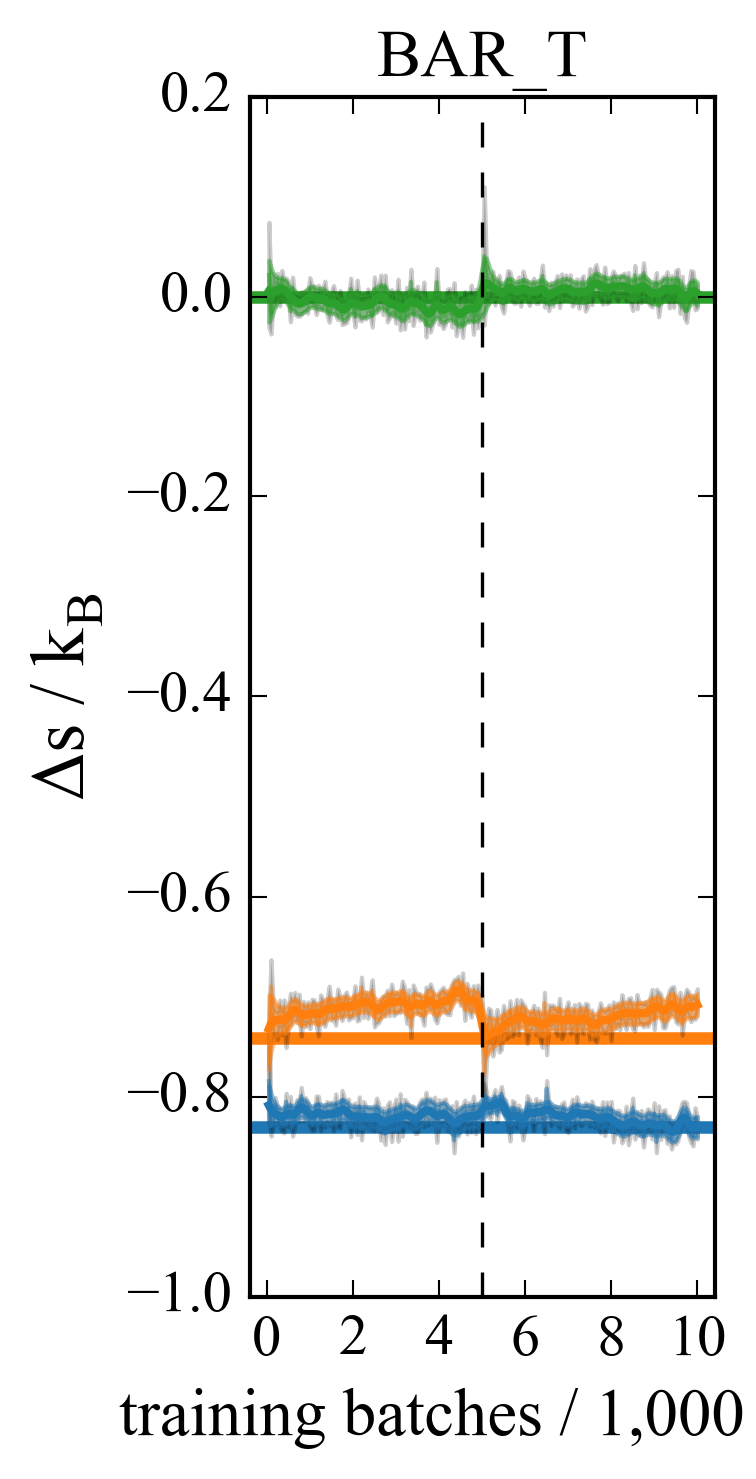

In [30]:
ind_min = np.argmin(delta_f_ground_truth)
print(ind_min)

# selecting which result to plot:
name = 'BAR_T'#5

av_u_GT = (estimates[:,:,8].mean(1) + estimates[:,:,8].mean(1))*0.5
negS_GT = np.array(delta_f_ground_truth-av_u_GT)
negS_GT  -= negS_GT[ind_min]

if type(name) is int:
    start =  20 #135
    end = 30
    x = fs_to_deltafs_(-(estimates[:,:,name].T - av_u_GT), ind_min=ind_min, start=start, median=True) # (m,n_states)
    xL = x - np.nan
    xU = x + np.nan
    if name == 0: name = 'AVMD_T'
    elif name == 1: name = 'AVMD_V'
    elif name == 2:
        name = 'AVBG'
        x = fs_to_deltafs_(-(np.array(av_BG.T) - av_u_GT), ind_min=ind_min, start=start)
        xL = x - np.nan
        xU = x + np.nan
    elif name == 3: name = 'EXPMD_T'
    elif name == 4: name = 'EXPMD_V'
    elif name == 5: name = 'EXPBG'
    elif name == 6: name = 'BAR_T(local)'
    elif name == 7: name = 'BAR_V(local)'
    else: print('not')
else: pass

if type(name) is str and 'BAR' in name and 'M' not in name:
    if 'V' in name: 
        which = 2
        start = 10
        end = 40 # 10        
    else: 
        which  = 0
        start = 0
        end = 1000
    x = fs_to_deltafs_(-(estimates_BAR[which] - av_u_GT), ind_min=ind_min, start=start, end=end) # (m,n_states)
    xL = x - estimates_BAR[which+1]
    xU = x + estimates_BAR[which+1]
else: pass

if type(name) is str and 'MBAR' in name:
    start = 10
    end = 40 # 10
    if 'V' in name: which = 2
    else: which  = 0
    x = fs_to_deltafs_(-(estimates_MBAR[which] - av_u_GT), ind_min=ind_min, start=start, end=end) # (m,n_states)
    xL = x - estimates_MBAR[which+1]
    xU = x + estimates_MBAR[which+1]
else: pass

fig = plt.figure(figsize=(2,5),dpi=300, facecolor="white")
[plt.plot([-400,grid[-1]+400],[-negS_GT[k]]*2, color=default_colours[k], linewidth=3, zorder=-10) for k in range(n_states)]

[plt.plot(grid, x[:,k], color=default_colours[k], alpha=0.5, linewidth=1) for k in range(n_states)]

[plt.fill_between(grid,
                 xL[:,k],
                 xU[:,k],
                 alpha=0.2,
                 color='black',
                
                ) for k in range(n_states)]
[plt.fill_between(grid,
                 simple_smoother_(xL[:,k],c=0.6),
                 simple_smoother_(xU[:,k],c=0.6),
                 alpha=0.5,
                 color=default_colours[k],
                
                ) for k in range(n_states)]

[plt.plot(grid, simple_smoother_(x[:,k],c=0.6), color=default_colours[k], linewidth=2) for k in range(n_states)]
# 'C'+str(k)
plt.plot([5000]*2,[-1.0,0.2],'--',color='black',linewidth=0.8)
plt.title(name, size=16)
plt.ylim(-1.0,0.2)
plt.xticks([0,2000,4000,6000,8000,10000],[0,2,4,6,8,10])
plt.xlim(-400.0,10400)
plt.xlabel('training batches / 1,000      ', size=16)
plt.ylabel('Δs / $\mathregular{k_B}$', labelpad=5, size=18)
plt.show()

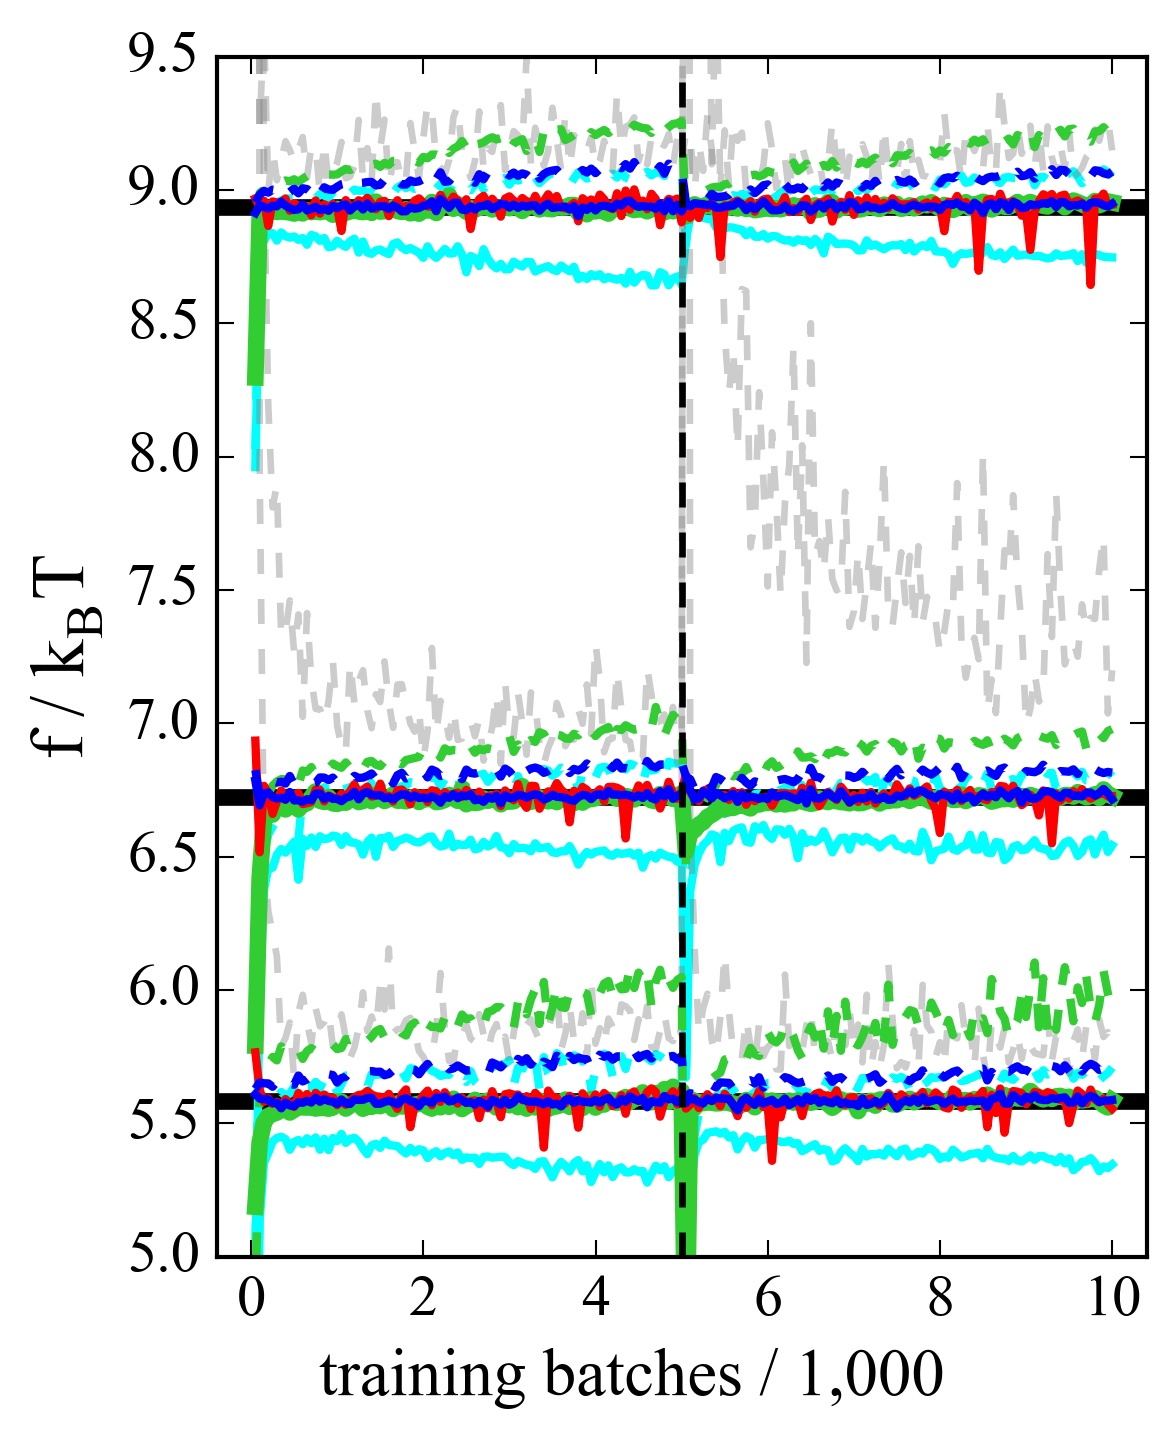

In [31]:
fig = plt.figure(figsize=(4,5),dpi=300, facecolor="white")

wf = 2

faint = '--'#'dotted'
lines = [faint,'solid',faint,faint,'solid','solid',faint,'solid']

_AVMD = 'cyan'
_EXPMD = 'limegreen'#'lime'
_AVBG_EXPBG = 'red'
_BAR = 'blue'

'''
_AVMD = 'C0'
_EXPMD = 'C1'
_AVBG_EXPBG = 'C2'
_BAR = 'C3'
'''
colors = [_AVMD,_AVMD,
          'grey',#_AVBG_EXPBG,
          _EXPMD,_EXPMD,
          _AVBG_EXPBG,
          _BAR,_BAR]

for i in range(8):
    if i in [4]: lw = 2
    else: lw = 1
    for k in range(n_states):
        if i == 2:
            plt.plot(grid,av_BG[k].T,linestyle=lines[i],color=colors[i], linewidth=0.8*wf, alpha=0.4)
        else:
            plt.plot(grid,estimates[k,:,i].T,linestyle=lines[i],color=colors[i], linewidth=lw*wf)
        
[plt.plot([-400,grid[-1]+400],[f_ground_truth[k]]*2, color='black', linewidth=2*wf, zorder=-10) for k in range(n_states)]

plt.plot([5000]*2,[5.,9.5],'--',color='black',linewidth=0.8*wf)

plt.xticks([0,2000,4000,6000,8000,10000],[0,2,4,6,8,10])
plt.xlim(-400.0,10400)
plt.xlabel('training batches / 1,000      ', size=16)
plt.ylabel('f / $\mathregular{k_B}$T', labelpad=5, size=18)
plt.ylim(5,9.5)
plt.show()

In [ ]:
##

when there is plenty of training data EXPBG looks great:

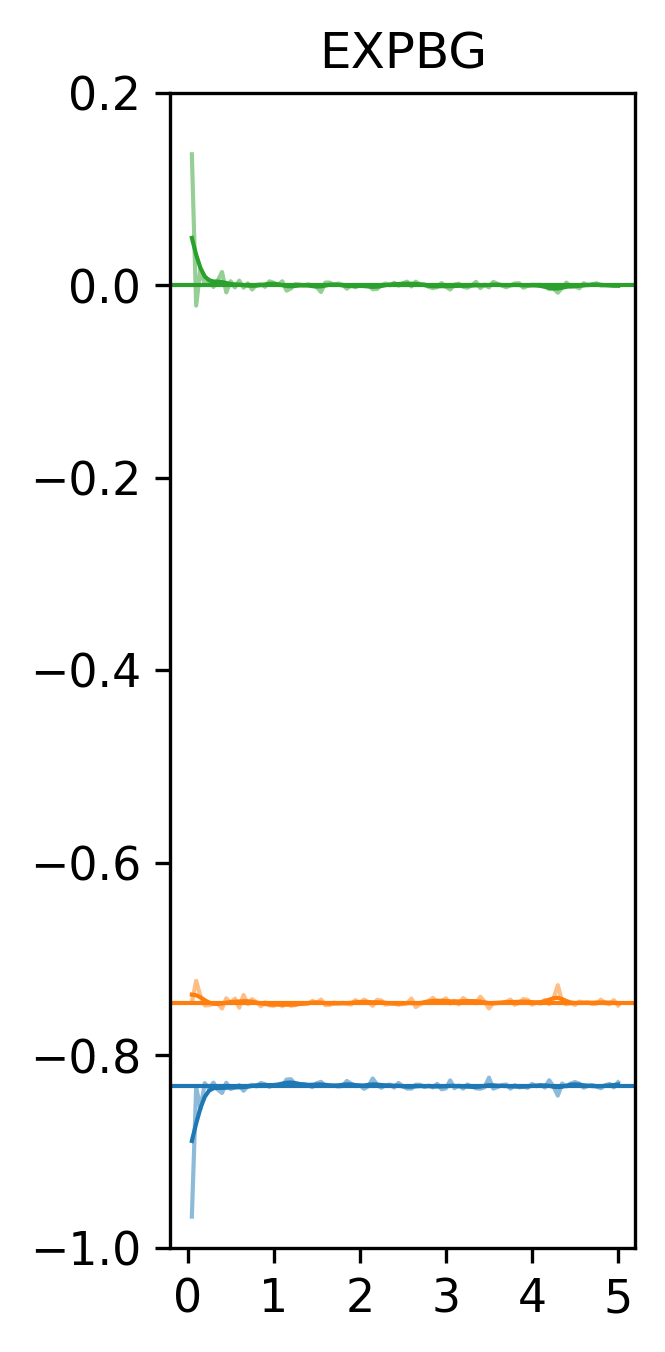